In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/drive/My Drive/team7/team7/data/0Xf5QSSF2b.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/My Drive/team7/team7/view', save_prefix='example', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/team7/team7/data/0Xf5QSSF2b.jpg'

In [39]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150), data_format="channels_first"))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

model.add(Conv2D(32, (3, 3), data_format="channels_first"))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 148, 148)      896       
_________________________________________________________________
activation_20 (Activation)   (None, 32, 148, 148)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 148, 148)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 74, 74)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 72, 72)        9248      
_________________________________________________________________
activation_21 (Activation)   (None, 32, 72, 72)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 72, 72)       

In [36]:
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.layers import Input, Flatten, Dense
from tensorflow.python.keras.models import Model
import numpy as np

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False) # data_format = "channels_first"
model_vgg16_conv.summary()

#Create your own input format (here 3x200x200)
input = Input(shape=(3,200,200),name = 'image_input')

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(1, activation='linear', name='pred')(x)

#Create your own model 
my_model = Model(input=input, output=x)

#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
my_model.summary()


#Then training with your data ! 

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

ValueError: ignored

In [0]:
# load data into dataframe with 'path' and 'target' columns
import pandas as pd
train_label_df = pd.read_csv('/content/drive/My Drive/team7/team7/data.csv', delimiter=' ', header=1, names=["uid"])
train_label_df["path"] = train_label_df['uid'].apply(lambda x : '/content/drive/My Drive/team7/team7/data/' + x.split(',')[-1][1:].split('/')[-1])
train_label_df["target"] = train_label_df['uid'].apply(lambda x : int(x.split(',')[1])/int(x.split(',')[2]))
train_label_df =train_label_df.drop(['uid'], axis=1)

train_label_df2 = pd.read_csv('/content/drive/My Drive/team7/team7/data_temp.csv', delimiter=' ', header=1, names=["uid"])
train_label_df2["path"] = train_label_df2['uid'].apply(lambda x : "/content/drive/My Drive/team7/team7/data/" + x.split(',')[0] + ".jpg")
train_label_df2["target"] = train_label_df2['uid'].apply(lambda x : int(x.split(',')[1])/int(x.split(',')[3]))
train_label_df2 =train_label_df2.drop(['uid'], axis=1)
#uid,likes,comments,followers
#B-A-bW9l1Gm,601,43,6715

In [41]:
train_label_df

,path,target
0,/content/drive/My Drive/team7/team7/data/B9dZz...,0.112025
1,/content/drive/My Drive/team7/team7/data/B9cQM...,0.638448
2,/content/drive/My Drive/team7/team7/data/B9a0I...,0.053981
3,/content/drive/My Drive/team7/team7/data/B9NnT...,0.143885
4,/content/drive/My Drive/team7/team7/data/B9XuP...,0.030143
...,...,...
615,/content/drive/My Drive/team7/team7/data/B9eu_...,0.030105
616,/content/drive/My Drive/team7/team7/data/B9eyO...,0.020260
617,/content/drive/My Drive/team7/team7/data/B9erb...,0.195320
618,/content/drive/My Drive/team7/team7/data/B9e2J...,0.026655


In [42]:
train_label_df2

,path,target
0,/content/drive/My Drive/team7/team7/data/B-A4q...,0.021855
1,/content/drive/My Drive/team7/team7/data/B-A67...,0.155491
2,/content/drive/My Drive/team7/team7/data/B-AaO...,0.040524
3,/content/drive/My Drive/team7/team7/data/B-ACy...,0.027340
4,/content/drive/My Drive/team7/team7/data/B-Ar4...,0.067915
...,...,...
810,/content/drive/My Drive/team7/team7/data/B9M_-...,0.289023
811,/content/drive/My Drive/team7/team7/data/B9Wej...,0.917219
812,/content/drive/My Drive/team7/team7/data/B9wPR...,0.128363
813,/content/drive/My Drive/team7/team7/data/B9Y_f...,0.286299


In [0]:
train_df = pd.concat([train_label_df, train_label_df2], axis=0).reset_index().drop(['index'], axis=1)

In [0]:
import matplotlib.pyplot as plt


In [0]:
a = train_df['target'].to_numpy()

In [0]:
from math import log

In [0]:
b = [log(x) for x in a]

(-10.0, 10.0)

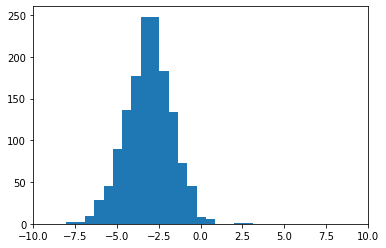

In [48]:
plt.hist(b, bins = 20)
plt.xlim((-10, 10))

In [49]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('/content/drive/My Drive/team7/team7/data/') if isfile(join('/content/drive/My Drive/team7/team7/data/', f))]
onlyfiles[465:470]

['B9ddE-5g3_1.jpg',
 'B9dgIl8g3Ex.jpg',
 'B9dI35wlVnL.jpg',
 'B9dK8edjxP-.jpg',
 'B9dn-jbgJvq.jpg']

In [50]:
'B-ITyGwnb6p.jpg' in onlyfiles

True

In [0]:
new_df = train_df
j = 0
for i in train_df['path']:
    #print(i.split("/")[-1])
    if i.split("/")[-1] not in onlyfiles:
        new_df = new_df.drop(train_df.index[train_df['path'] == i].tolist())
    else:
      j+=1
train_df = new_df.reset_index()
# All are found

In [52]:
train_df

,index,path,target
0,0,/content/drive/My Drive/team7/team7/data/B9dZz...,0.112025
1,1,/content/drive/My Drive/team7/team7/data/B9cQM...,0.638448
2,2,/content/drive/My Drive/team7/team7/data/B9a0I...,0.053981
3,3,/content/drive/My Drive/team7/team7/data/B9NnT...,0.143885
4,4,/content/drive/My Drive/team7/team7/data/B9XuP...,0.030143
...,...,...,...
1430,1430,/content/drive/My Drive/team7/team7/data/B9M_-...,0.289023
1431,1431,/content/drive/My Drive/team7/team7/data/B9Wej...,0.917219
1432,1432,/content/drive/My Drive/team7/team7/data/B9wPR...,0.128363
1433,1433,/content/drive/My Drive/team7/team7/data/B9Y_f...,0.286299


In [53]:
batch_size = 32
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=5,
    
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col = 'path',
        y_col = 'target',
        directory='data',
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='other',
       #  preprocessing_function=lambda x: x print(x)
)  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
#validation_generator = test_datagen.flow_from_directory(
#        'data/validation',
#        target_size=(150, 150),
#        batch_size=batch_size,
#        class_mode='binary')

Found 1435 validated image filenames.


In [1]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())  

['/device:CPU:0', '/device:XLA_CPU:0']


In [0]:
a = train_generator.next()

In [56]:
a[0].shape

(32, 150, 150, 3)

In [57]:
a[1]

array([2.08976032e-02, 2.08983998e-01, 1.35541951e-01, 1.66965050e-01,
       1.78988327e-01, 5.07317073e-02, 1.58958106e-01, 8.58680393e-02,
       1.58795039e-02, 2.26628075e-01, 1.65409900e-02, 5.55929788e-02,
       3.72193071e-02, 5.26445264e-01, 1.26459144e-01, 9.30755735e-03,
       1.76018596e-01, 4.17466705e-02, 4.94286815e-02, 8.85322994e-02,
       7.86782061e-03, 6.57851779e-02, 5.33267700e-03, 3.26892084e-04,
       7.11452225e-02, 3.73134328e-02, 3.73866117e-02, 3.73977695e-01,
       9.49152542e-02, 4.12094065e-02, 6.68656716e-01, 3.10979480e-02])

In [58]:
model.fit_generator(
        train_generator,
        steps_per_epoch=1400,
        epochs=50,
        #validation_data=validation_generator,
        #validation_steps=800 // batch_size)
        verbose = 2,
        use_multiprocessing=False
)
model.save_weights('first_try.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50


NotFoundError: ignored